In [202]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import folium

<Axes: >

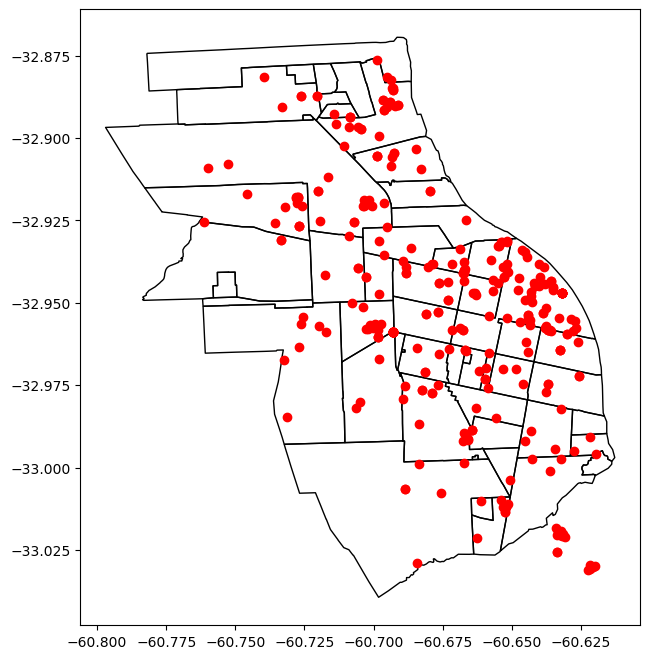

In [378]:
#m = folium.Map([-32.9, -60.66], zoom_start = 11, zoom_control = False, tiles = "cartodb positron")
datos_rosario = pd.read_excel("Rosario F.xlsx")
# Eliminamos los datos que están por fuera de nuestro mapa de la ciudad de Rosario
datos_rosario = datos_rosario[datos_rosario.Coord1__Latitude < -32.85]
datos_rosario = datos_rosario[datos_rosario.Coord1__Longitude < -60.5]
datos_rosario = datos_rosario[datos_rosario.Coord1__Longitude > -60.78]

barrios_rosario = gpd.read_file("barrios.geojson")
encuestados = gpd.GeoDataFrame(
    datos_rosario, geometry=gpd.points_from_xy(datos_rosario.Coord1__Longitude,datos_rosario.Coord1__Latitude, crs="EPSG:4326")
)
barrios_rosario_2 = barrios_rosario.plot(figsize=(8,8), color="None", edgecolor="black")
encuestados.plot(ax=barrios_rosario_2, marker="o", color="red")